In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수지원
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. Seaborn 의 tips 데이터로 시각화 실습

## (1) 데이터 준비

In [2]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## (2) total_bill(총 식사 금액)에 대한 tip 분포 확인 -> 히스토그램


Text(0, 0.5, 'Total Bill')

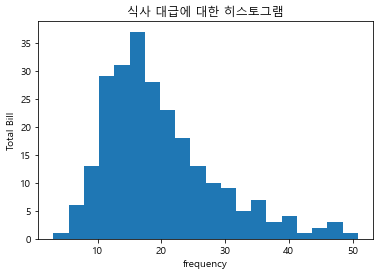

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tips["total_bill"], bins=20)
ax.set_title("식사 대급에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

## (3) total_bill(총 식사 금액)과 tip 과의 관계 -> 산점도

Text(0, 0.5, 'Tip')

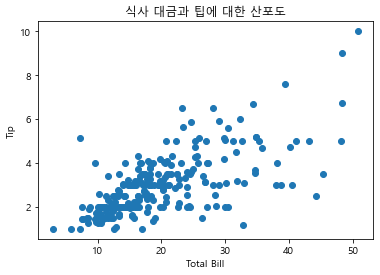

In [7]:
fig = plt.figure()                
ax = fig.add_subplot(1, 1, 1)    

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

## (4) 성별에 따른 total_bill과 tip의 관계 -> 산포도(관계면 산포도)

In [10]:
# 전처리 : 문자인 성별데이터를 숫자로 바꿔주기

def record_sex(sex):
    if sex == "Female" :
        return 0
    else:
        return 1
    
tips["sex_scatter"] = tips["sex"].apply(record_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color,sex_sca,sex_scatter
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,0


Text(0, 0.5, 'Tip')

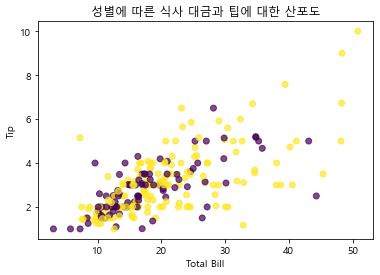

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c = tips["sex_scatter"], alpha = 0.7)
    # alpha = : 투명도 조절

ax.set_title("성별에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

## (5) 성별과 인원수에 따른 total_bill과 tip의 관계 -> 산포도(관계면 산포도)

Text(0, 0.5, 'tip')

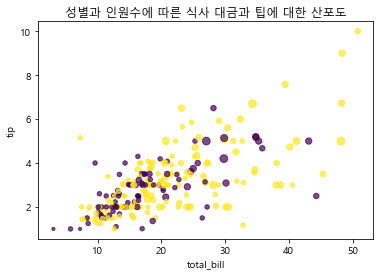

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_scatter"], alpha=0.7,
          s=tips["size"]*10)

ax.set_title("성별과 인원수에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("total_bill")
ax.set_ylabel("tip")

## (6) 성별과 팁의 관계 -> 상자그림

Text(0, 0.5, 'Tip')

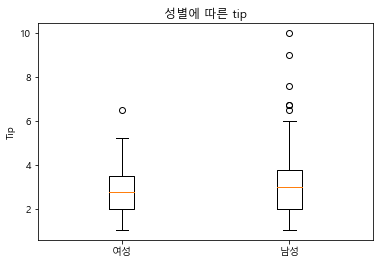

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], 
            tips[tips["sex"]=="Male"]["tip"]], labels=["여성", "남성"])

ax.set_title("성별에 따른 tip")
ax.set_ylabel("Tip")

# 2. 서울 신규 민간아파트 분양가격 동향 시각화 실습 

## (1) 데이터 준비

In [17]:
# 데이터 출처 : https://data.go.kr

apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.head()
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


## (2) 데이터 전처리

### 1) 변수명 변경

In [18]:
apt1 = apt.copy()

apt1.columns = ["city", "size", "year", "month", "price"]
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


### 2) price를 실수형으로 변환

In [19]:
apt1["price"] = pd.to_numeric(apt1["price"].str.strip())
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


### 3) 서울만 선택해서 "전체" size만 조회

In [25]:
%%time 
apt_seoul = apt1.query('(city=="서울") and (size=="전체")')

CPU times: total: 31.2 ms
Wall time: 9.61 ms


### 4) apt_seoul 데이터에서 city와 size컬럼 삭제

In [26]:
apt_seoul1 = apt_seoul.drop(["city", "size"], axis=1)

In [27]:
apt_seoul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


### 5) year, month를 가지고 다중 인덱스 처리

In [28]:
apt_seoul1 = apt_seoul1.set_index(["year", "month"])

In [29]:
apt_seoul1.head(10)

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0

## (3) 서울 신규 민간아파트 분양가격 동향 시각화

<AxesSubplot:xlabel='year,month'>

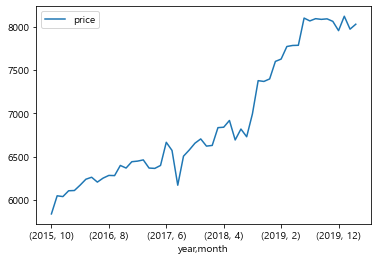

In [32]:
apt_seoul1.plot(figsize=(6, 4))